C:\Users\kinfeylo\AppData\Local\Temp/ipykernel_28868/3694886636.py:25: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)


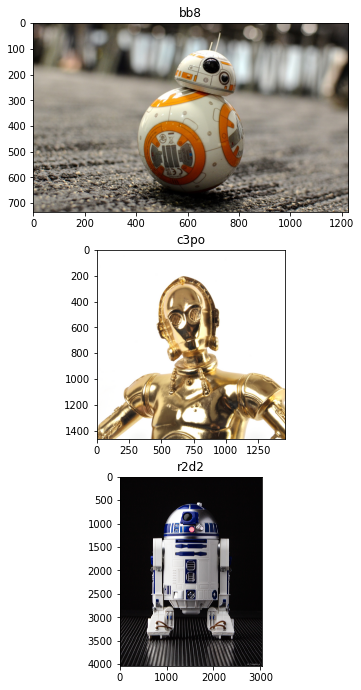

In [12]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


get_ipython().run_line_magic('matplotlib', 'inline')

imgdir = 'download'

fig = plt.figure(figsize=(12, 16))

dir_num = 0
for root, folders, filenames in os.walk(imgdir):
    for folder in folders:
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile = os.path.join(root,folder, file)
        img = Image.open(imgFile)
        a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        imgplot = plt.imshow(img)
        a.set_title(folder)
        dir_num = dir_num + 1

In [13]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def resize_image(img, size): 
    from PIL import Image, ImageOps 
    
    img.thumbnail(size, Image.ANTIALIAS)
    
    newimg = Image.new("RGB", size, (255, 255, 255))
    
    if np.array(img).shape[2] == 4:
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)), mask=img.split()[3])
        print(size[0])
        print(size[1])
        print(img.size[0])
        print(img.size[1])
        print(img.split()[3])
        
    else:
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
        print(size[0])
        print(size[1])
        print(img.size[0])
        print(img.size[1])
        
    return newimg

In [14]:
size = (128,128)

indir = 'download'
outdir = 'image'

In [15]:
if os.path.exists(outdir):
    shutil.rmtree(outdir)

for root, dirs, filenames in os.walk(indir):
    for d in dirs:
        print('processing folder ' + d)
        saveFolder = os.path.join(outdir,d)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        files = os.listdir(os.path.join(root,d))
        for f in files:
            imgFile = os.path.join(root,d, f)
            print("reading " + imgFile)
            img = Image.open(imgFile)
            proc_img = resize_image(img, size)
            saveAs = os.path.join(saveFolder, 'img_' + f)
            print("writing " + saveAs)
            proc_img.save(saveAs)
            #break

processing folder bb8
reading download\bb8\00000001.jpg
128
128
128
77
writing image\bb8\img_00000001.jpg
reading download\bb8\00000002.jpg
128
128
91
128
writing image\bb8\img_00000002.jpg
reading download\bb8\00000004.jpg
128
128
128
72
writing image\bb8\img_00000004.jpg
reading download\bb8\00000006.jpg
128
128
128
72
writing image\bb8\img_00000006.jpg
reading download\bb8\00000007.jpg
128
128
96
128
writing image\bb8\img_00000007.jpg
reading download\bb8\00000008.jpg
128
128
128
72
writing image\bb8\img_00000008.jpg
reading download\bb8\00000009.jpg
128
128
128
72
writing image\bb8\img_00000009.jpg
reading download\bb8\00000015.jpg
128
128
128
107
writing image\bb8\img_00000015.jpg
reading download\bb8\00000016.jpg
128
128
128
80
writing image\bb8\img_00000016.jpg
reading download\bb8\00000017.jpg
128
128
128
99
writing image\bb8\img_00000017.jpg
reading download\bb8\00000018.jpg
128
128
128
85
writing image\bb8\img_00000018.jpg
reading download\bb8\00000019.jpg
128
128
72
128
writ

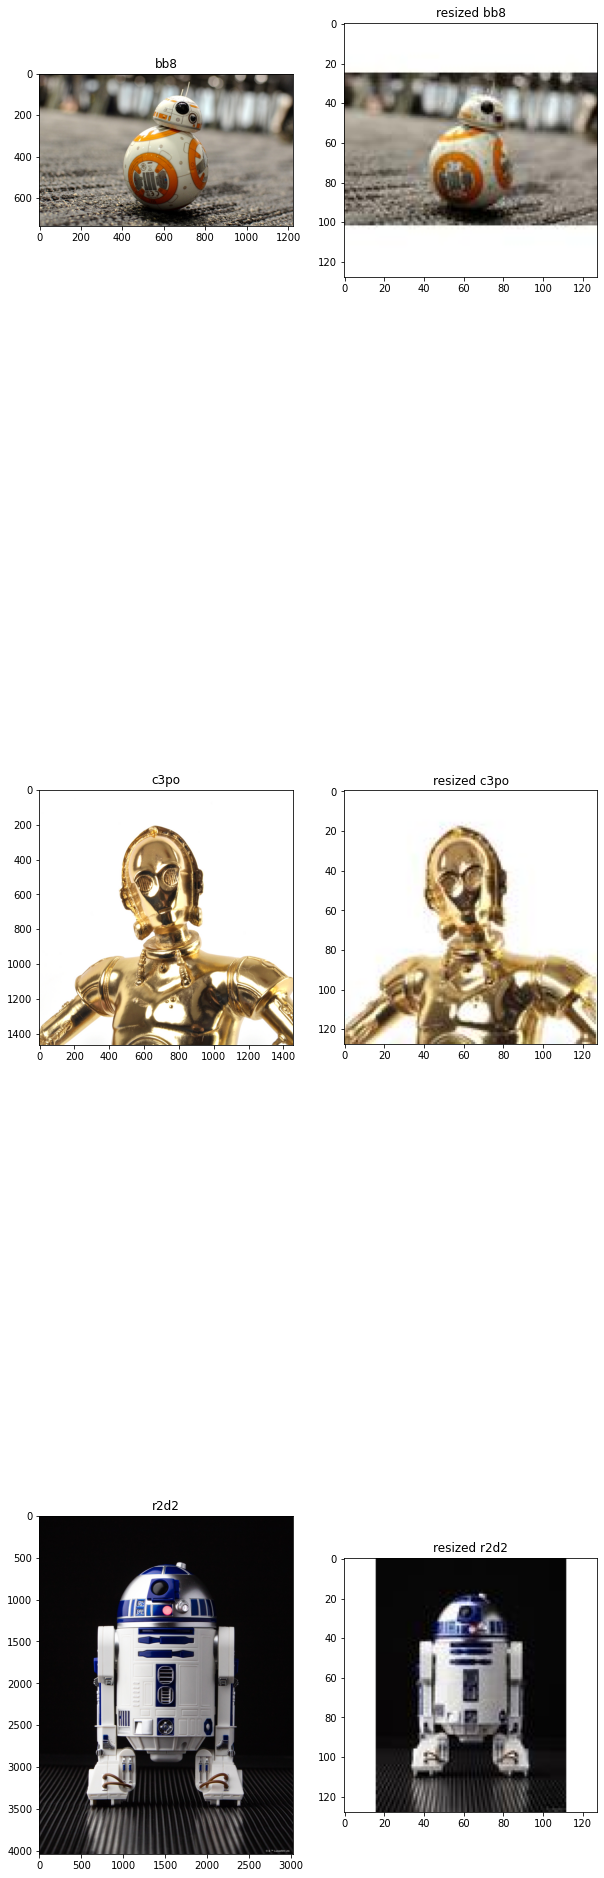

In [17]:
fig = plt.figure(figsize=(10, 40))

img_num = 1
for root, folders, filenames in os.walk(indir):
    for folder in folders:
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile1 = os.path.join(indir,folder, file)
        img1 = Image.open(imgFile1)
        a=fig.add_subplot(len(folders), 2, img_num)
        imgplot = plt.imshow(img1)
        a.set_title(folder)
        img_num = img_num + 1
        imgFile2 = os.path.join(outdir,folder, 'img_' + file)
        img2 = Image.open(imgFile2)
        b=fig.add_subplot(len(folders), 2, img_num)
        imgplot = plt.imshow(img2)
        b.set_title('resized ' + folder)
        img_num = img_num + 1